# Dependency of PTSD level from the daily stress level.

Based on the Daily Stress processing we are of opinion that *Daily Stress level* is an **interval** variable.
Based on a processing method described at "SCORING PART 5 –TRAUMA SYMPTOMS DSM-V" we are of opinion that *PTSD level* is an **interval** variable too.
It allows us ...




In [17]:
from matplotlib.pyplot import hist, xlabel, ylabel, figure, bar_label, scatter, title, xlim
from matplotlib import pyplot as plt
# Imports
from pandas import DataFrame, read_excel
from os.path import expanduser, join

from scipy.stats import f
from seaborn import heatmap, set_style, color_palette, lmplot, distplot, displot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [18]:
# Gather Data
io: str = join(expanduser('~'), "Documents", "Data_Emigrant Study and APA.xlsx")

outcome: DataFrame    = read_excel(io=io, sheet_name='PTSD', header=0, index_col=0, usecols="A,GW", skiprows=[1])
y: DataFrame = outcome

predictors: DataFrame = read_excel(io=io,
                                   sheet_name='Harvard Trauma Questionairre_2',
                                   header=0,
                                   index_col=0,
                                   usecols="A, FQ, FS, FU, FW, FY, GA, GC, GE, GG, GI, GK, GM, GO, GQ, GS, GU, GW",
                                   skiprows=[1])
X: DataFrame = predictors

X = X.dropna(axis="rows", how="any")
y: DataFrame = y.dropna(axis="rows", how="any")

# Проверка на gooдубликаты, важно!
print(X[X.index.duplicated(keep=False)])
print(y[y.index.duplicated(keep=False)])

y: DataFrame = y[y.index.isin(X.index)]
X: DataFrame = X[X.index.isin(y.index)]

Empty DataFrame
Columns: [Отсутствие жилья / Lack of shelter, Отсутствие еды или воды / Lack of food or water, Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care, Конфискация имущества / Confiscation of personal property, Избиение / Beating to the body, Изнасилование / Rape, Другие виды сексуального домогательства или унижения / Other types of sexual abuse or sexual humiliation, Арест / Imprisonment, Рэкет или ограбление / Extortion or robbery, Промывка мозгов / Brainwashing, Разделение с членами семьи / Separation from family members, Предательство члена семьи или друга / Betrayal of family member, or friend, Присутствие при избиении другого человека / Witness beating to head or body, Присутствие при пытках / Witness torture, Присутствие при изнасиловании или сексуальных домогательствах / Witness rape or sexual abuse, Утопление / Near drowning, Голод / Starvation]
Index: []
Empty DataFrame
Columns: [PTSD]
Index: []


In [19]:
outcome.describe()

,PTSD
count,65.000000
mean,1.895385
std,0.560388
min,1.080000
25%,1.560000
50%,1.760000
75%,2.320000
max,3.280000


# Data visualization

[Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '17'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

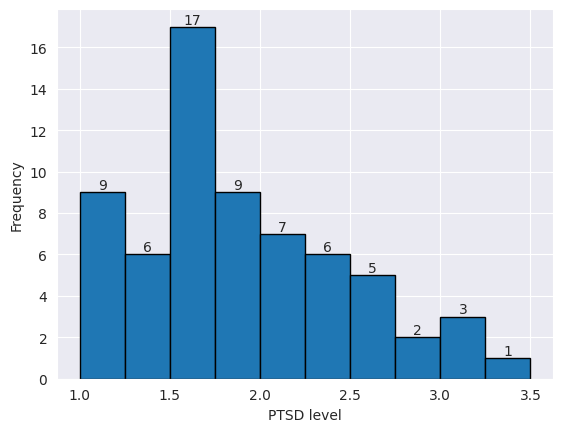

In [20]:
values, bins, bars = hist(y['PTSD'], ec='black', bins=10, range=(1, 3.5))
xlabel('PTSD level')
ylabel('Frequency')
bar_label(bars)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


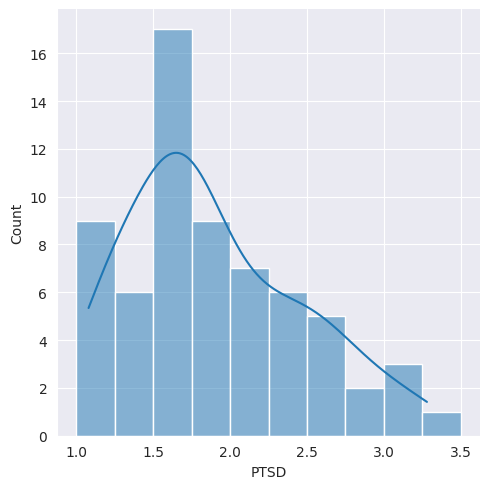

In [21]:
displot(y['PTSD'], bins=10, kde=True, binrange=(1, 3.5))

<Axes: >

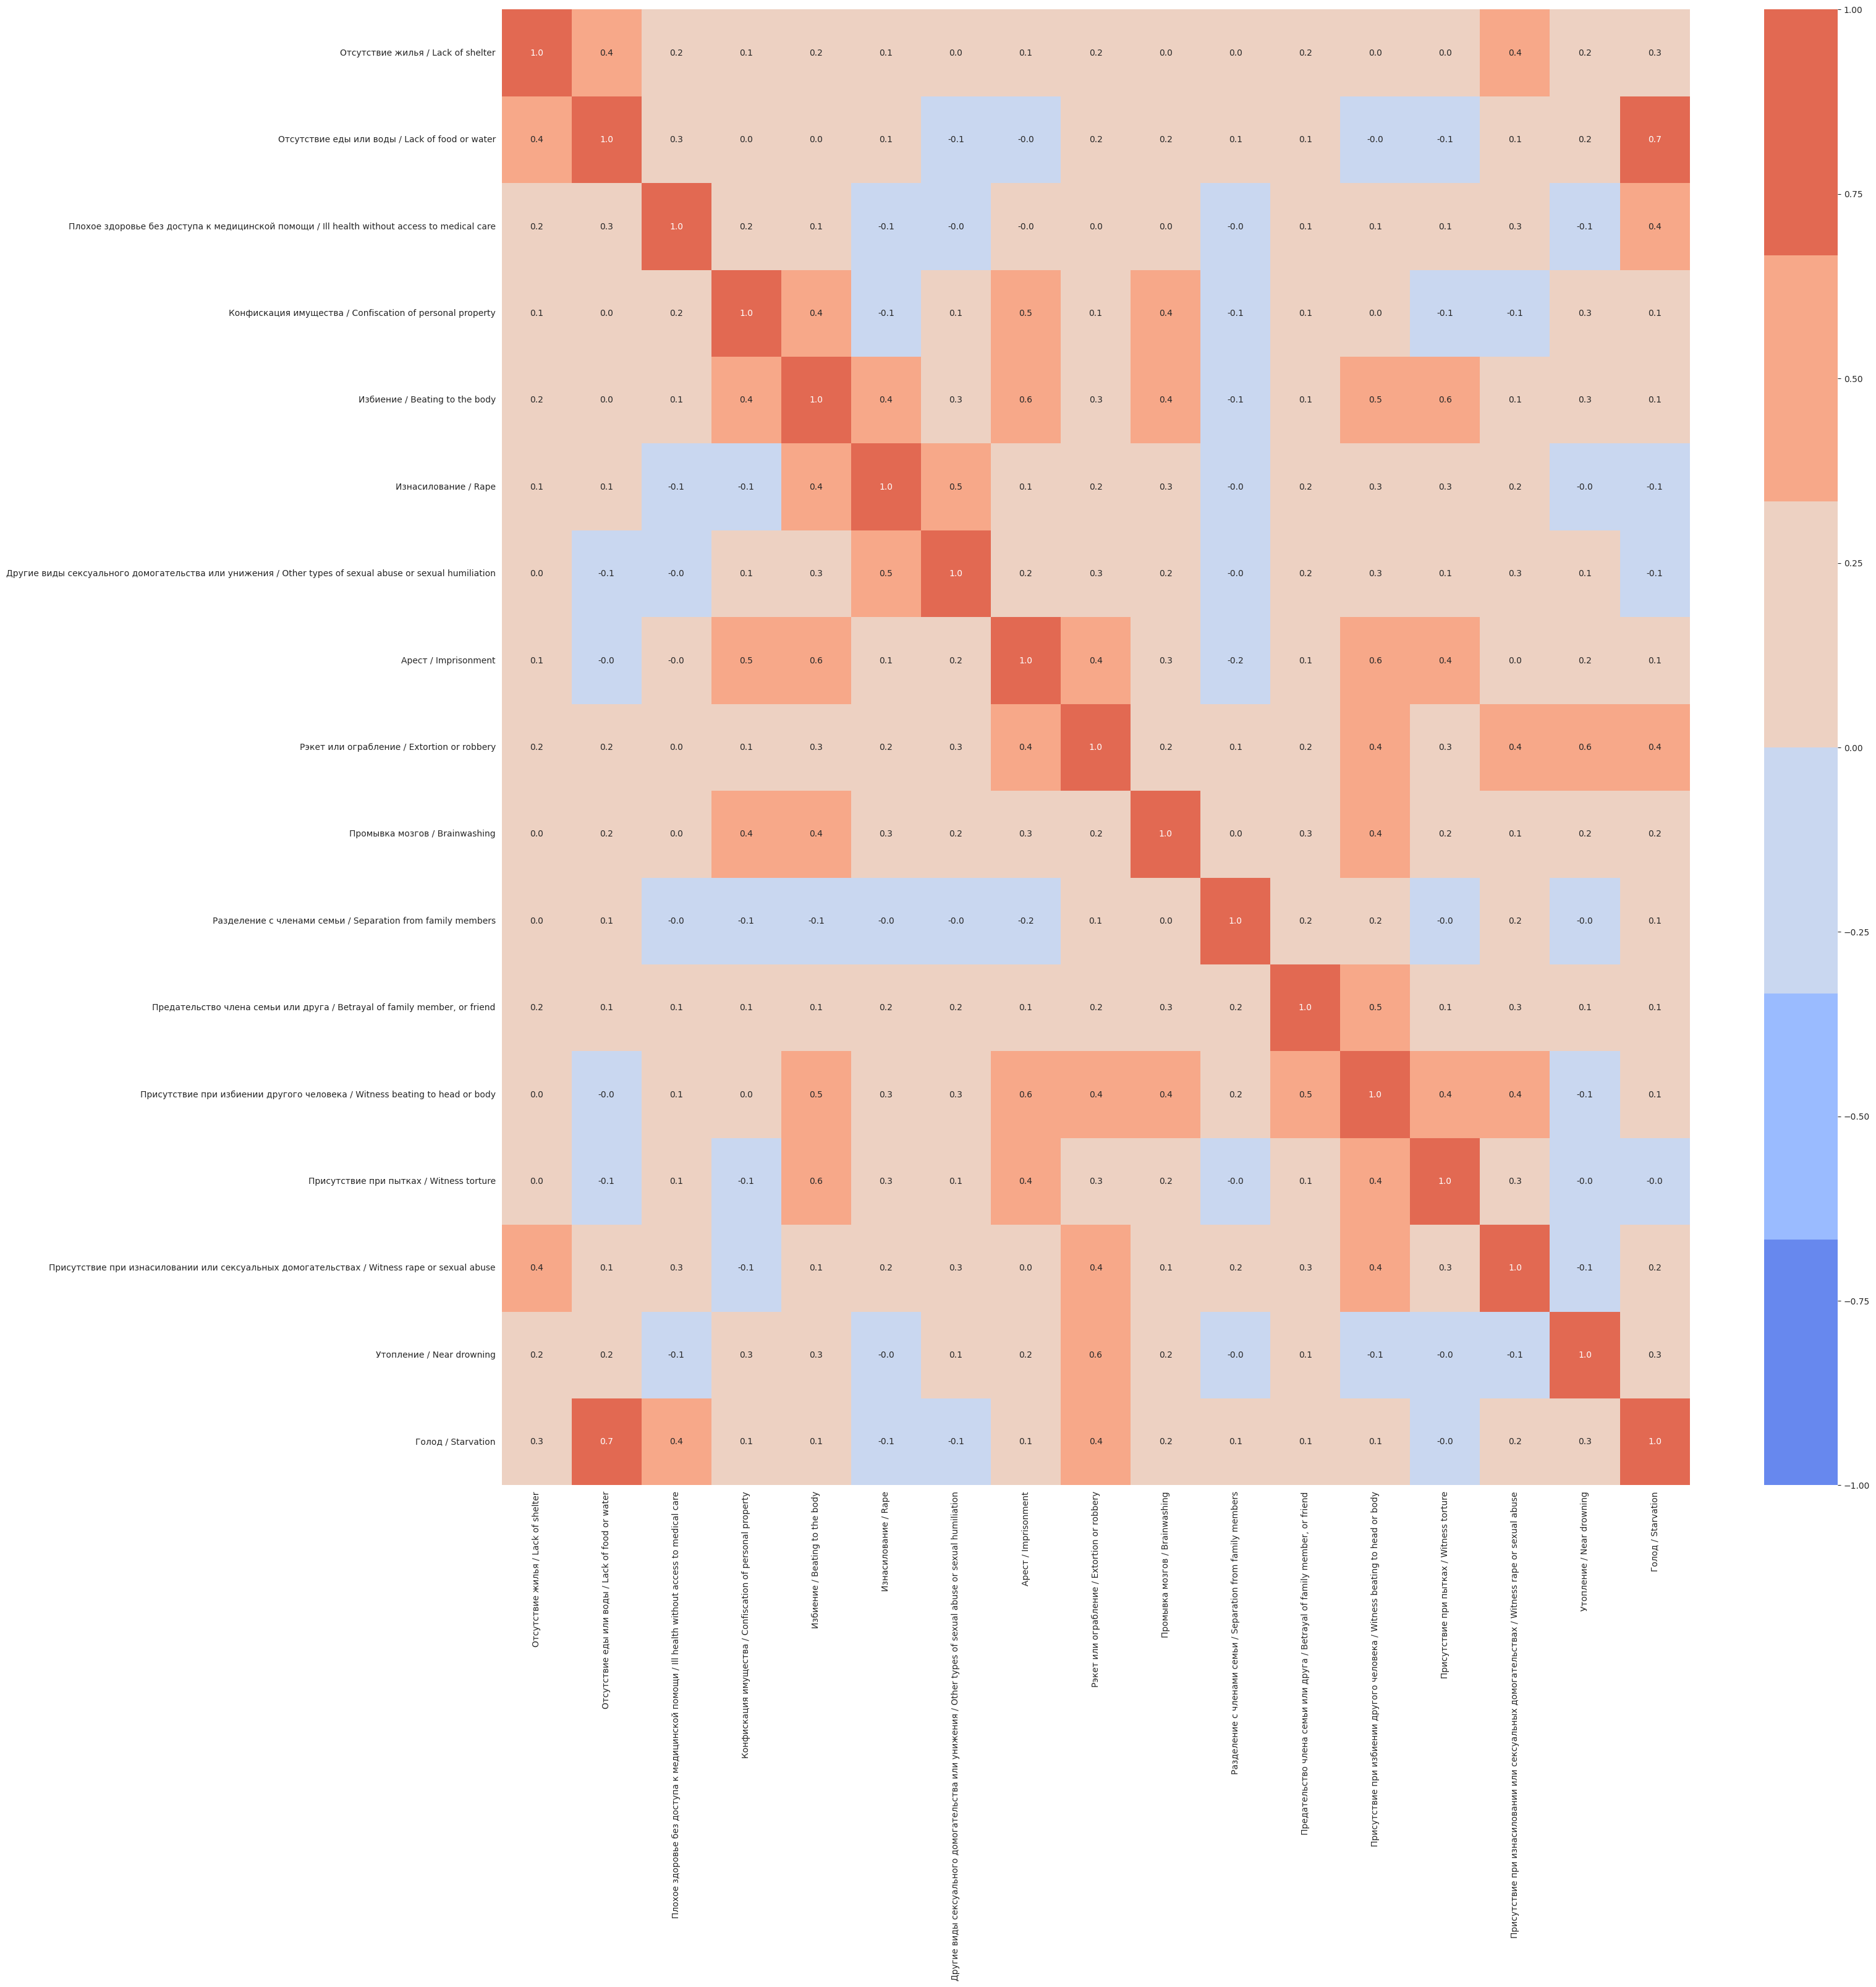

In [22]:
figure(figsize=(31, 31))
heatmap(X.corr(), annot=True, fmt='.1f', cmap=color_palette("coolwarm"), vmin=-1, vmax=1)
# set_style('white')

# Data cleaning

In [23]:
X.drop(labels="Голод / Starvation", axis="columns", inplace=True)

# Correlation between PTSD level and daily stressors

In [24]:
X.corrwith(other=y["PTSD"], axis=0, method='pearson', numeric_only=True)

Отсутствие жилья / Lack of shelter                                                                          0.296595
Отсутствие еды или воды / Lack of food or water                                                             0.147961
Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care                0.370740
Конфискация имущества / Confiscation of personal property                                                   0.029410
Избиение / Beating to the body                                                                              0.159401
Изнасилование / Rape                                                                                        0.117254
Другие виды сексуального домогательства или унижения / Other types of sexual abuse or sexual humiliation    0.083816
Арест / Imprisonment                                                                                        0.012741
Рэкет или ограбление / Extortion or robbery                     

Text(0, 0.5, 'PTSD')

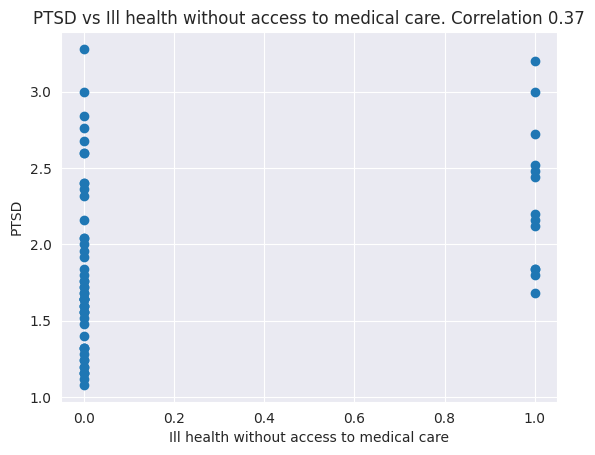

In [25]:
scatter(x=X["Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care"],
        y=y["PTSD"])
title(f'PTSD vs Ill health without access to medical care. Correlation {round(y.corrwith(X["Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care"], axis=0, method="pearson", numeric_only=True)[0], ndigits=2)}')
xlabel('Ill health without access to medical care')
ylabel('PTSD')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


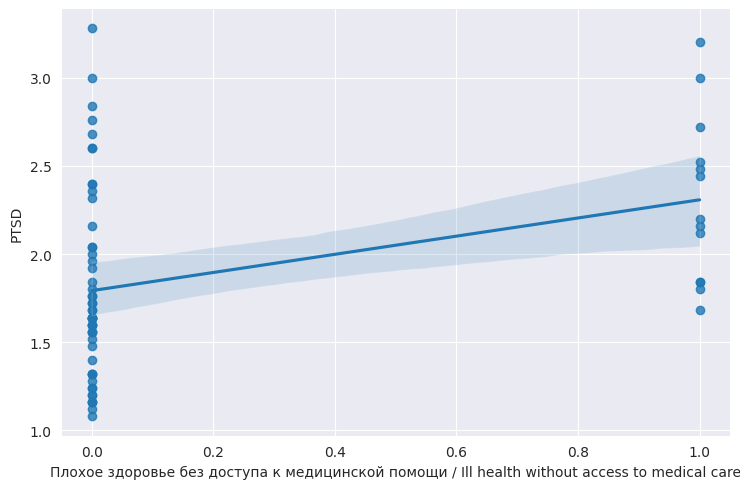

In [26]:
lmplot(x="Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care",
       y="PTSD",
       data=DataFrame(data={"Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care": X["Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care"],
                            "PTSD": y["PTSD"]}),
       height=5,
       aspect=1.5)

In [27]:
X.columns

Index(['Отсутствие жилья / Lack of shelter',
       'Отсутствие еды или воды / Lack of food or water',
       'Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care',
       'Конфискация имущества / Confiscation of personal property',
       'Избиение / Beating to the body', 'Изнасилование / Rape',
       'Другие виды сексуального домогательства или унижения / Other types of sexual abuse or sexual humiliation',
       'Арест / Imprisonment', 'Рэкет или ограбление / Extortion or robbery',
       'Промывка мозгов / Brainwashing',
       'Разделение с членами семьи / Separation from family members',
       'Предательство члена семьи или друга / Betrayal of family member, or friend',
       'Присутствие при избиении другого человека / Witness beating to head or body',
       'Присутствие при пытках / Witness torture',
       'Присутствие при изнасиловании или сексуальных домогательствах / Witness rape or sexual abuse',
       'Утопление / Near drownin

In [28]:
# X.drop(labels=["Утопление / Near drowning",
#                "Другие виды сексуального домогательства или унижения / Other types of sexual abuse or sexual humiliation",
#                "Рэкет или ограбление / Extortion or robbery ",
#                "Избиение / Beating to the body",
#                "Промывка мозгов / Brainwashing",
#                "Отсутствие жилья / Lack of shelter "], axis="columns", inplace=True)

In [29]:
X.corrwith(other=outcome["PTSD"], axis=0, method='pearson', numeric_only=True)

Отсутствие жилья / Lack of shelter                                                                          0.296595
Отсутствие еды или воды / Lack of food or water                                                             0.147961
Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care                0.370740
Конфискация имущества / Confiscation of personal property                                                   0.029410
Избиение / Beating to the body                                                                              0.159401
Изнасилование / Rape                                                                                        0.117254
Другие виды сексуального домогательства или унижения / Other types of sexual abuse or sexual humiliation    0.083816
Арест / Imprisonment                                                                                        0.012741
Рэкет или ограбление / Extortion or robbery                     

# Multiple Linear Regression

In [30]:

linearRegression = LinearRegression()
linearRegression.fit(X=X, y=y)

print('R-squared:', linearRegression.score(X=X, y=y))

R-squared: 0.30379088563801415


# statsmodels.regression.linear_model.OLS

In [31]:
X_incl_const = add_constant(data=X)

model = OLS(endog=y, exog=X_incl_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PTSD   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.309
Date:                Fri, 25 Aug 2023   Prob (F-statistic):              0.231
Time:                        22:02:46   Log-Likelihood:                -42.316
No. Observations:                  65   AIC:                             118.6
Df Residuals:                      48   BIC:                             155.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [32]:
print(f"R-squared: {round(results.rsquared, 2)}") # R^2
print(f"F-statistic: {round(results.fvalue, 2)}") # F-статистика
print(f"F-critical: {f.ppf(q=1-0.05, dfn=results.df_model, dfd=results.df_resid)}") # F-критическое
print(f"p-value (F-statistic): {round(results.f_pvalue, 2)}") # p-value (F-статистика)

R-squared: 0.3
F-statistic: 1.31
F-critical: 1.8591670128511661
p-value (F-statistic): 0.23


In [33]:
round(results.pvalues, 2)

const                                                                                                       0.00
Отсутствие жилья / Lack of shelter                                                                          0.14
Отсутствие еды или воды / Lack of food or water                                                             0.74
Плохое здоровье без доступа к медицинской помощи / Ill health without access to medical care                0.02
Конфискация имущества / Confiscation of personal property                                                   0.54
Избиение / Beating to the body                                                                              0.44
Изнасилование / Rape                                                                                        0.48
Другие виды сексуального домогательства или унижения / Other types of sexual abuse or sexual humiliation    0.76
Арест / Imprisonment                                                                            